In [2]:
import csv

def get_mapping(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    data = list(file_reader)
    file.close()

    dict = {}

    for id, name in data:
        dict[id] = name

    return dict

In [3]:
#q1
small_mapping = get_mapping("small_mapping.csv")
small_mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
small_mapping["nm0001219"]

'Gary Fleder'

In [5]:
#q3
nm_vals = []
for key in small_mapping:
    if "nm" in key:
        nm_vals.append(small_mapping[key])

nm_vals


['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [6]:
#q4
lname_g = []
for key in small_mapping:
    if small_mapping[key].split(" ")[1][0] == "G":
        lname_g.append(key)

lname_g

['nm0000154', 'nm0000418']

In [7]:
def get_raw_movies(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    sheet = list(file_reader)
    file.close()

    header = sheet[0]
    data = sheet[1:]

    l = []
    for entry in data:
        dict = {}
        for i in range(6):
            if header[i] == "directors" or header[i] == "actors" or header[i] == "genres":
                dict[header[i]] = list(entry[i].split(","))
            elif header[i] == "year":
                dict[header[i]] = int(entry[i])
            elif header[i] == "rating":
                dict[header[i]] = float(entry[i])
            else:
                dict[header[i]] = entry[i]
        
        l.append(dict)

    return l
    

In [8]:
#q5
small_movies = get_raw_movies("small_movies.csv")
small_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [9]:
#q6
len(small_movies[1]["actors"])

4

In [10]:
#q7
small_movies[0]["actors"][0]

'nm0000131'

In [11]:
def get_movies(movies_path, mapping_path):
    movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)

    for movie in movies:
        movie["title"] = mapping[movie["title"]]

        for i in range(len(movie["directors"])):
            movie["directors"][i] = mapping[movie["directors"][i]]

        for i in range(len(movie["actors"])):
            movie["actors"][i] = mapping[movie["actors"][i]]
        


    return movies

            


In [12]:
#q8
small = get_movies("small_movies.csv", "small_mapping.csv")
small[1]["title"]

'Lethal Weapon'

In [13]:
#q9
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [14]:
#q10
small[-1]["directors"]

['Richard Donner']

In [15]:
#q11
movies = get_movies("movies.csv", "mapping.csv")
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [16]:
#q12
movies[0:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [17]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [18]:
#q13
import copy

movies_temp = copy.deepcopy(movies)
filter_movies_by_year(movies_temp, 1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [19]:
#q14
movies_temp = copy.deepcopy(movies)
filter_movies_by_year(movies_temp, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [20]:
#q15
def unique_of_category(category):
    l = []
    for movie in movies:
        for i in range(len(movie[category])):
            l.append(movie[category][i])

    return len(set(l))

unique_of_category("actors")


2605

In [21]:
#q16
unique_of_category("genres")

18

In [22]:
#q17
movie_names = []
for movie in movies:
    movie_names.append(movie["title"])

sorted(set(movie_names)).pop(-1)

'Zorba the Greek'

In [23]:
#q18
total_rating = 0
total_movies = 0
for movie in movies:
    total_rating += movie["rating"]
    total_movies += 1

total_rating / total_movies

6.401659528907912

In [24]:
#q19
highest_rated_val = 0
highest_rated_ind = 0
for i in range(len(movies)):
    if movies[i]["rating"] > highest_rated_val:
        highest_rated_ind = i
        highest_rated_val = movies[i]["rating"]

movies[highest_rated_ind]["title"]

'The Godfather'

In [25]:
#q20
oldest_movie_val = 3000
oldest_movie_ind = 0
for i in range(len(movies)):
    if movies[i]["year"] < oldest_movie_val:
        oldest_movie_ind = i
        oldest_movie_val = movies[i]["year"]

movies[oldest_movie_ind]["title"]

'Shoulder Arms'

In [26]:
def bucketize(movie_list, movie_key):
    buckets = {}
    
    for movie in movie_list:
        if type(movie[movie_key]) == list: # if the key is a list of stuff (movie appears multiple times)
            pass
            for entry in movie[movie_key]:
                if entry not in buckets:
                    buckets[entry] = []
                buckets[entry].append(movie)
        else: # key is just a single (only appears once)
            if not movie[movie_key] in buckets:
                buckets[movie[movie_key]] = []
            buckets[movie[movie_key]].append(movie)
    
    return buckets

In [27]:
buckets = bucketize(small, "year")
buckets

{2003: [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 1987: [{'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}]}

In [28]:
buckets = bucketize(small, "genres")
buckets

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [29]:
#q21
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [30]:
#q22
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [31]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [33]:
#q25
len(bucketize(small, "directors"))

2

In [34]:
#q26
len(bucketize(movies, "directors"))

1247

In [35]:
#q27
genres = bucketize(movies, "genres")
d = {}

for g in genres:
    d[g] = len(genres[g])
    
d

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [36]:
%matplotlib inline

In [37]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

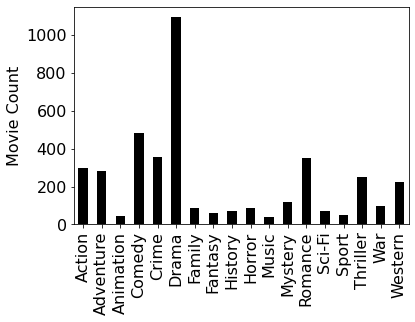

In [38]:
#q28
plot_dict(d, "Movie Count")

In [39]:
def bucket_counts(data, fil):
    buckets = bucketize(data, fil)
    
    
#     for entry in data:
#         if type(entry[fil]) == list:
#             for e in entry[fil]:
#                 if e not in buckets:
#                     buckets[e] = []
#                 buckets[e].append(entry)
#         else:
#             if not entry[fil] in buckets:
#                 buckets[entry[fil]] = []
#             buckets[entry[fil]].append(movie)
                
    for buck in buckets:
        buckets[buck] = len(buckets[buck])

    return buckets

def filter_year(movies, start, end):
    opt = []
    
    for movie in movies:
        if not end == None and movie["year"] < end:
            if start == None:
                opt.append(movie)
            elif movie["year"] >= start:
                opt.append(movie)
        else:
            if not start == None and movie["year"] >= start:
                opt.append(movie)
            
    return opt

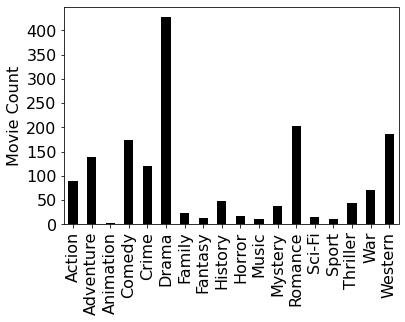

In [40]:
#q29
plot_dict(bucket_counts(filter_year(movies, None, 1970), "genres"), "Movie Count")

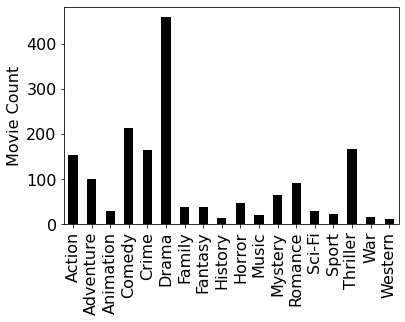

In [41]:
#q30
plot_dict(bucket_counts(filter_year(movies, 1990, None), "genres"), "Movie Count")

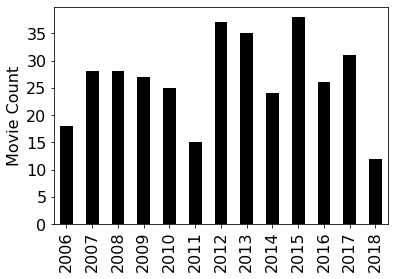

In [42]:
#q31
plot_dict(bucket_counts(filter_year(movies, 2006, None), "year"), "Movie Count")

In [43]:
#q32
actors = bucketize(movies, "actors")
acting_careers = {}

for actor in actors:
    earliest = None
    latest = None
    
    for movie in actors[actor]:
        if earliest == None or movie["year"] < earliest:
            earliest = movie["year"]
        if latest == None or movie["year"] > latest:
            latest = movie["year"]

    if latest - earliest >= 45:
        acting_careers[actor] = latest - earliest

acting_careers

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [44]:
#q33
directors = bucketize(movies, "directors")
directing_careers = {}

for director in directors:
    earliest = None
    latest = None
    
    for movie in directors[director]:
        if earliest == None or movie["year"] < earliest:
            earliest = movie["year"]
        if latest == None or movie["year"] > latest:
            latest = movie["year"]

    if latest - earliest >= 25:
        directing_careers[director] = latest-earliest

directing_careers

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [45]:
#q35
from operator import itemgetter

directors = bucketize(movies, "directors")
directing_careers = []

for director in directors:
    earliest = None
    latest = None
    
    for movie in directors[director]:
        if earliest == None or movie["year"] < earliest:
            earliest = movie["year"]
        if latest == None or movie["year"] > latest:
            latest = movie["year"]

    if latest - earliest >= 25:
        directing_careers.append({"name": director, "span": int(latest-earliest)})

sorted(directing_careers, key=itemgetter("span"), reverse=True)[:21]

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25},
 {'name': 'William A. Graham', 'span': 25}]

In [46]:
#q34
actors = bucketize(movies, "actors")
acting_careers = []

for actor in actors:
    earliest = None
    latest = None
    
    for movie in actors[actor]:
        if earliest == None or movie["year"] < earliest:
            earliest = movie["year"]
        if latest == None or movie["year"] > latest:
            latest = movie["year"]

    acting_careers.append({"name": actor, "span": int(latest-earliest)})

sorted(acting_careers, key=itemgetter("span"), reverse=True)[:10]

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [47]:
#q36
def get_median(li):
    li = sorted(li)
    if len(li) % 2 == 1:
        return li[int(len(li) / 2)]
    else:
        return (li[int(len(li) / 2)] + li[int(len(li) / 2)-1]) / 2

actors = bucketize(movies, "actors")
best_actors = []

for actor in actors:
    ratings = []
    for movie in actors[actor]:
        ratings.append(movie["rating"])
    best_actors.append({"name": actor, "rating":get_median(ratings), "count":len(actors[actor])})

sorted(best_actors, key=itemgetter("rating"), reverse=True)[:9]

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [48]:
#q37
directors = bucketize(movies, "directors")
best_directors = []

for director in directors:
    ratings = []
    for movie in directors[director]:
        ratings.append(movie["rating"])
    best_directors.append({"name": director, "rating":get_median(ratings), "count":len(directors[director])})

sorted(best_directors, key=itemgetter("rating"), reverse=True)[:12]

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [49]:
#q38
actors = bucketize(movies, "actors")
best_actors = []

for actor in actors:
    ratings = []
    for movie in actors[actor]:
        ratings.append(movie["rating"])
    if len(actors[actor]) >= 5:
        best_actors.append({"name": actor, "rating":get_median(ratings), "count":len(actors[actor])})

sorted(best_actors, key=itemgetter("rating"), reverse=True)[:14]

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.149999999999999, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.050000000000001, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.050000000000001, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [50]:
#q39
actors = bucketize(movies, "actors")
best_actors = []

for actor in actors:
    ratings = []
    for movie in actors[actor]:
        ratings.append(movie["rating"])
    if len(actors[actor]) >= 30:
        best_actors.append({"name": actor, "rating":get_median(ratings), "count":len(actors[actor])})

sorted(best_actors, key=itemgetter("rating"), reverse=True)[:16]

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [51]:
#q40
directors = bucketize(movies, "directors")
best_directors = []

for director in directors:
    ratings = []
    for movie in directors[director]:
        ratings.append(movie["rating"])
    if len(directors[director]) >= 8:
        best_directors.append({"name": director, "rating":get_median(ratings), "count":len(directors[director])})

sorted(best_directors, key=itemgetter("rating"), reverse=True)[:8]

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]